In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

df = pd.read_csv("EEG_data.csv")
demo = pd.read_csv("demographic_info.csv")

https://www.section.io/engineering-education/how-to-build-a-glass-box-model-using-interpretml-python/


In [2]:
demo

subject ID   age    ethnicity  gender
0           0    25  Han Chinese       M
1           1    24  Han Chinese       M
2           2    31      English       M
3           3    28  Han Chinese       F
4           4    24      Bengali       M
5           5    24  Han Chinese       M
6           6    24  Han Chinese       M
7           7    25  Han Chinese       M
8           8    25  Han Chinese       M
9           9    24  Han Chinese       F

In [49]:
df = df.merge(demo, left_on= "SubjectID", right_on= "subject ID")
df.drop(columns=["subject ID"], inplace=True)

In [50]:
df[(df["VideoID"]==1.0) & (df["SubjectID"]==2.0)]

SubjectID  VideoID  Attention  Mediation   Raw    Delta    Theta  \
2702        2.0      1.0       56.0       75.0  25.0  12621.0   7349.0   
2703        2.0      1.0       54.0       74.0  75.0  16602.0  18387.0   
2704        2.0      1.0       54.0       61.0  89.0   8845.0  19186.0   
2705        2.0      1.0       50.0       56.0  36.0   3159.0  10727.0   
2706        2.0      1.0       48.0       63.0  34.0   3899.0  15266.0   
...         ...      ...        ...        ...   ...      ...      ...   
2839        2.0      1.0       75.0       54.0  50.0  15079.0   8269.0   
2840        2.0      1.0       70.0       60.0  40.0   6005.0  16913.0   
2841        2.0      1.0       56.0       77.0  70.0   8434.0  11923.0   
2842        2.0      1.0       61.0       75.0  52.0  13695.0  12479.0   
2843        2.0      1.0       63.0       80.0  39.0   9478.0   9009.0   

       Alpha1   Alpha2    Beta1    Beta2  Gamma1  Gamma2  predefinedlabel  \
2702   5681.0   2510.0   3400.0   5506.0  1383.0  3846.0              0.0   
2703  12975.0   6035.0   4599.0   4952.0  2708.0  1301.0              0.0   
2704   5893.0   6425.0  18801.0   5321.0  3307.0  2184.0              0.0   
2705  10615.0   3412.0   6760.0   3009.0  2738.0  2024.0              0.0   
2706  23868.0   6137.0   7475.0  13871.0  3061.0  4230.0              0.0   
...       ...      ...      ...      ...     ...     ...              ...   
2839   4596.0  12440.0   8900.0   5913.0  3337.0  2491.0              0.0   
2840   3435.0  19429.0   5513.0   8183.0  3215.0  1870.0              0.0   
2841  12467.0  12541.0   3883.0   6623.0  3138.0  4414.0              0.0   
2842   8095.0   4642.0   6868.0   9398.0  2097.0  2037.0              0.0   
2843   7206.0  21390.0   2377.0  12116.0  2635.0  2450.0              0.0   

      user-definedlabeln   age  ethnicity  gender  
2702                 1.0    31    English       M  
2703                 1.0    31    English       M  
2704                 1.0    31    English       M  
2705                 1.0    31    English       M  
2706                 1.0    31    English       M  
...                  ...   ...        ...     ...  
2839                 1.0    31    English       M  
2840                 1.0    31    English       M  
2841                 1.0    31    English       M  
2842                 1.0    31    English       M  
2843                 1.0    31    English       M  

[142 rows x 18 columns]

In [51]:
df["Attention"]=df["Attention"].replace(0, df["Attention"].mean())
df["Mediation"]=df["Mediation"].replace(0, df["Mediation"].mean())

In [13]:
df.head()

SubjectID  VideoID  Attention  Mediation    Raw      Delta     Theta  \
0        0.0      0.0       56.0       43.0  278.0   301963.0   90612.0   
1        0.0      0.0       40.0       35.0  -50.0    73787.0   28083.0   
2        0.0      0.0       47.0       48.0  101.0   758353.0  383745.0   
3        0.0      0.0       47.0       57.0   -5.0  2012240.0  129350.0   
4        0.0      0.0       44.0       53.0   -8.0  1005145.0  354328.0   

     Alpha1   Alpha2    Beta1     Beta2   Gamma1   Gamma2  predefinedlabel  \
0   33735.0  23991.0  27946.0   45097.0  33228.0   8293.0              0.0   
1    1439.0   2240.0   2746.0    3687.0   5293.0   2740.0              0.0   
2  201999.0  62107.0  36293.0  130536.0  57243.0  25354.0              0.0   
3   61236.0  17084.0  11488.0   62462.0  49960.0  33932.0              0.0   
4   37102.0  88881.0  45307.0   99603.0  44790.0  29749.0              0.0   

   user-definedlabeln   age    ethnicity  gender  
0                 0.0    25  Han Chinese       M  
1                 0.0    25  Han Chinese       M  
2                 0.0    25  Han Chinese       M  
3                 0.0    25  Han Chinese       M  
4                 0.0    25  Han Chinese       M

In [15]:
df.columns

Index(['SubjectID', 'VideoID', 'Attention', 'Mediation', 'Raw', 'Delta',
       'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2',
       'predefinedlabel', 'user-definedlabeln', ' age', ' ethnicity',
       ' gender'],
      dtype='object')

In [52]:
df1 = df.copy()

In [53]:
enc=OneHotEncoder()
 
#Passing encoded columns
'''
NOTE: we have converted the enc.fit_transform() method to array because the fit_transform method
of OneHotEncoder returns SpiPy sparse matrix this enables us to save space when we
have huge  number of categorical variables
'''
enc_data=pd.DataFrame(enc.fit_transform(df1[[' ethnicity',' gender']]).toarray())
 
#Merge with main
df1=df1.join(enc_data)

In [59]:
df1.head()

SubjectID  VideoID  Attention  Mediation    Raw      Delta     Theta  \
0        0.0      0.0       56.0       43.0  278.0   301963.0   90612.0   
1        0.0      0.0       40.0       35.0  -50.0    73787.0   28083.0   
2        0.0      0.0       47.0       48.0  101.0   758353.0  383745.0   
3        0.0      0.0       47.0       57.0   -5.0  2012240.0  129350.0   
4        0.0      0.0       44.0       53.0   -8.0  1005145.0  354328.0   

     Alpha1   Alpha2    Beta1  ...   Gamma1   Gamma2  predefinedlabel  \
0   33735.0  23991.0  27946.0  ...  33228.0   8293.0              0.0   
1    1439.0   2240.0   2746.0  ...   5293.0   2740.0              0.0   
2  201999.0  62107.0  36293.0  ...  57243.0  25354.0              0.0   
3   61236.0  17084.0  11488.0  ...  49960.0  33932.0              0.0   
4   37102.0  88881.0  45307.0  ...  44790.0  29749.0              0.0   

   user-definedlabeln   age  eth_1  eth_2  eth_3  g_1  g_2  
0                 0.0    25    0.0    0.0    1.0  0.0  1.0  
1                 0.0    25    0.0    0.0    1.0  0.0  1.0  
2                 0.0    25    0.0    0.0    1.0  0.0  1.0  
3                 0.0    25    0.0    0.0    1.0  0.0  1.0  
4                 0.0    25    0.0    0.0    1.0  0.0  1.0  

[5 rows x 21 columns]

In [55]:
del df1[" ethnicity"]
del df1[" gender"]

In [58]:
df1 = df1.rename(columns={0: "eth_1", 1: "eth_2", 2: "eth_3", 3: "g_1", 4: "g_2"})

In [61]:
X = df1.copy()
y = X.pop("user-definedlabeln")

In [62]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

### Modelling

In [66]:
df["user-definedlabeln"].unique()

array([0., 1.])

In [82]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 10, criterion = "entropy")
rfc.fit(X_train, y_train)
y_pred1 = rfc.predict(X_val)

from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_val,y_pred1)
print("Random Forest")
print(cm1)  

predict_accuracy_score = accuracy_score(y_val, y_pred1)
predict_precision_score = precision_score(y_val, y_pred1) 
predict_recall_score = recall_score(y_val, y_pred1)
predict_f1_score = f1_score(y_val, y_pred1)
#f1 score parametre bakılacak

print(predict_accuracy_score)
print(predict_precision_score)
print(predict_recall_score)
print(predict_f1_score)

Random Forest
[[1860  213]
 [ 293 1862]]
0.880321665089877
0.8973493975903615
0.8640371229698376
0.8803782505910166


In [ ]:
#ISI HARİTASI

In [83]:
import seaborn as sns

In D:\ProgramFiles\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\ProgramFiles\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\ProgramFiles\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In D:\ProgramFiles\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\ProgramFiles\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.jpeg_quality rcparam was 

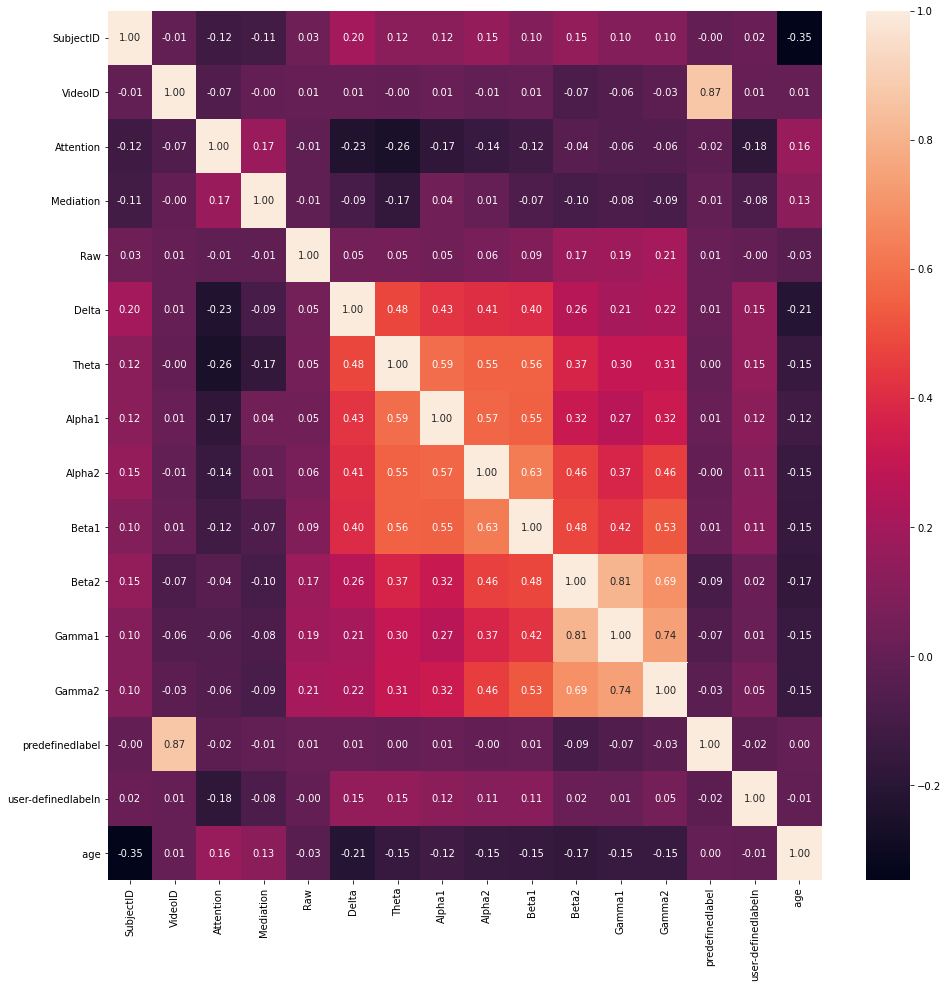

In [87]:
plt.subplots(figsize=(16,16))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

In [90]:
pd.set_option("display.max_rows",9000)

In [92]:
df.head(5000)

SubjectID  VideoID   Attention   Mediation     Raw      Delta  \
0           0.0      0.0   56.000000   43.000000   278.0   301963.0   
1           0.0      0.0   40.000000   35.000000   -50.0    73787.0   
2           0.0      0.0   47.000000   48.000000   101.0   758353.0   
3           0.0      0.0   47.000000   57.000000    -5.0  2012240.0   
4           0.0      0.0   44.000000   53.000000    -8.0  1005145.0   
5           0.0      0.0   44.000000   66.000000    73.0  1786446.0   
6           0.0      0.0   43.000000   69.000000   130.0   635191.0   
7           0.0      0.0   40.000000   61.000000    -2.0   161098.0   
8           0.0      0.0   43.000000   69.000000    17.0   492796.0   
9           0.0      0.0   47.000000   69.000000   -59.0    82048.0   
10          0.0      0.0   48.000000   38.000000   -14.0   757165.0   
11          0.0      0.0   44.000000   48.000000    72.0   667513.0   
12          0.0      0.0   47.000000   34.000000   121.0   165360.0   
13          0.0      0.0   48.000000   30.000000   -52.0   737665.0   
14          0.0      0.0   47.000000   48.000000    69.0   577024.0   
15          0.0      0.0   57.000000   43.000000    44.0   234964.0   
16          0.0      0.0   57.000000   40.000000   144.0   671467.0   
17          0.0      0.0   70.000000   40.000000    25.0    33290.0   
18          0.0      0.0   74.000000   44.000000  -138.0  1025416.0   
19          0.0      0.0   67.000000   53.000000    25.0   756442.0   
20          0.0      0.0   70.000000   66.000000   124.0    87109.0   
21          0.0      0.0   57.000000   53.000000    43.0   802937.0   
22          0.0      0.0   53.000000   51.000000    35.0   157687.0   
23          0.0      0.0   41.000000   50.000000   119.0   613031.0   
24          0.0      0.0   27.000000   37.000000    37.0   603204.0   
25          0.0      0.0   29.000000   50.000000   102.0   234796.0   
26          0.0      0.0   30.000000   35.000000    24.0   188099.0   
27          0.0      0.0   37.000000   21.000000   -51.0   632782.0   
28          0.0      0.0   30.000000   41.000000    61.0   477853.0   
29          0.0      0.0   26.000000   43.000000   290.0   731447.0   
30          0.0      0.0   20.000000   56.000000   -21.0  1099119.0   
31          0.0      0.0   20.000000   67.000000     4.0  1969931.0   
32          0.0      0.0   35.000000   48.000000  -156.0  1363838.0   
33          0.0      0.0   48.000000   48.000000   -22.0   637681.0   
34          0.0      0.0   63.000000   51.000000     3.0   423411.0   
35          0.0      0.0   61.000000   53.000000     0.0   585120.0   
36          0.0      0.0   54.000000   67.000000   186.0  1103969.0   
37          0.0      0.0   51.000000   50.000000    40.0   480086.0   
38          0.0      0.0   57.000000   50.000000    88.0    48448.0   
39          0.0      0.0   69.000000   56.000000    26.0     9313.0   
40          0.0      0.0   80.000000   54.000000    -7.0   252800.0   
41          0.0      0.0   67.000000   51.000000    91.0   195366.0   
42          0.0      0.0   69.000000   47.000000    80.0    18403.0   
43          0.0      0.0   77.000000   34.000000    39.0    11723.0   
44          0.0      0.0   66.000000   43.000000    10.0   233282.0   
45          0.0      0.0   70.000000   63.000000   103.0   150690.0   
46          0.0      0.0   74.000000   69.000000    74.0    18823.0   
47          0.0      0.0   69.000000   80.000000    24.0   341908.0   
48          0.0      0.0   90.000000   63.000000    53.0     8588.0   
49          0.0      0.0   90.000000   60.000000    87.0   256616.0   
50          0.0      0.0   77.000000   61.000000    89.0    22853.0   
51          0.0      0.0   81.000000   57.000000   -40.0     8661.0   
52          0.0      0.0   70.000000   57.000000    11.0    91553.0   
53          0.0      0.0   77.000000   60.000000   -20.0   580030.0   
54          0.0      0.0   84.000000   51.000000   -33.0   130837.0   
55          0.0      0.0   75.

In [86]:
import matplotlib.pyplot as plt

In [84]:
df.head()

SubjectID  VideoID  Attention  Mediation    Raw      Delta     Theta  \
0        0.0      0.0       56.0       43.0  278.0   301963.0   90612.0   
1        0.0      0.0       40.0       35.0  -50.0    73787.0   28083.0   
2        0.0      0.0       47.0       48.0  101.0   758353.0  383745.0   
3        0.0      0.0       47.0       57.0   -5.0  2012240.0  129350.0   
4        0.0      0.0       44.0       53.0   -8.0  1005145.0  354328.0   

     Alpha1   Alpha2    Beta1     Beta2   Gamma1   Gamma2  predefinedlabel  \
0   33735.0  23991.0  27946.0   45097.0  33228.0   8293.0              0.0   
1    1439.0   2240.0   2746.0    3687.0   5293.0   2740.0              0.0   
2  201999.0  62107.0  36293.0  130536.0  57243.0  25354.0              0.0   
3   61236.0  17084.0  11488.0   62462.0  49960.0  33932.0              0.0   
4   37102.0  88881.0  45307.0   99603.0  44790.0  29749.0              0.0   

   user-definedlabeln   age    ethnicity  gender  
0                 0.0    25  Han Chinese       M  
1                 0.0    25  Han Chinese       M  
2                 0.0    25  Han Chinese       M  
3                 0.0    25  Han Chinese       M  
4                 0.0    25  Han Chinese       M

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 10, criterion = "entropy")
rfc.fit(x_train1, y_train)
y_pred1 = rfc.predict(x_val1)

from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_val,y_pred1)
print("Random Forest")
print(cm1)  

h1n1_accuracy_score = accuracy_score(y_val["h1n1_vaccine"], y_pred1)
print(h1n1_accuracy_score)
models.append("RandomForest")
h1n1_accuracy.append(h1n1_accuracy_score)


#XGBoost - h1n1_vaccine
xgb1 = XGBClassifier()
xgb1.fit(x_train1, y_train["h1n1_vaccine"])
y_pred_xgb1 = xgb1.predict(x_val1) 

cm_xgb1 = confusion_matrix(y_val["h1n1_vaccine"],y_pred_xgb1)
print("XGBoost")
print(cm_xgb1) 

h1n1_accuracy_score = accuracy_score(y_val["h1n1_vaccine"], y_pred_xgb1)
print(h1n1_accuracy_score)
models.append("XGBoost")
h1n1_accuracy.append(h1n1_accuracy_score)


#Gradient Descent - h1n1_vaccine
gbc1 = GradientBoostingClassifier()
gbc1.fit(x_train1, y_train["h1n1_vaccine"])
y_pred_gbc1 = gbc1.predict(x_val1)

cm_gbc1 = confusion_matrix(y_val["h1n1_vaccine"],y_pred_gbc1)
print("GradientBoositngClassifier")
print(cm_gbc1) 

h1n1_accuracy_score = accuracy_score(y_val["h1n1_vaccine"], y_pred_gbc1)
print(h1n1_accuracy_score)
models.append("Gradient Descent")
h1n1_accuracy.append(h1n1_accuracy_score)


# Logistic Regression - h1n1_vaccine

from sklearn.linear_model import LogisticRegression
log1 = LogisticRegression(random_state=0)
log1.fit(x_train1, y_train["h1n1_vaccine"])
y_pred_log1 = log1.predict(x_val1)

cm_log1 = confusion_matrix(y_val["h1n1_vaccine"],y_pred_log1)
print("Logistic Regression")
print(cm_log1) 

h1n1_accuracy_score = accuracy_score(y_val["h1n1_vaccine"], y_pred_log1)
print(h1n1_accuracy_score)
models.append("Logistic")
h1n1_accuracy.append(h1n1_accuracy_score)


# KNN - h1n1_vaccine
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(x_train1, y_train["h1n1_vaccine"])
y_pred_knn1 = knn1.predict(x_val1)

cm_knn1 = confusion_matrix(y_val["h1n1_vaccine"],y_pred_knn1)
print("KNN")
print(cm_knn1) 

h1n1_accuracy_score = accuracy_score(y_val["h1n1_vaccine"], y_pred_knn1)
print(h1n1_accuracy_score)
models.append("KNN")
h1n1_accuracy.append(h1n1_accuracy_score)